<center>
<h1 style="color:red; font-size:70px;"> FeelNet</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

2025-08-29 10:03:06.724942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-29 10:03:08.356765: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-29 10:03:09.385291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756454590.184119    7436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756454590.357414    7436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756454592.174186    7436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Studio del dataset

In [2]:
trDir = "Dataset/train"  
valDir = "Dataset/test"  
datagen = ImageDataGenerator(rescale=1./255)

# Dataset di training
trDat = datagen.flow_from_directory(
    trDir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Dataset di validation
valDat = datagen.flow_from_directory(
    valDir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


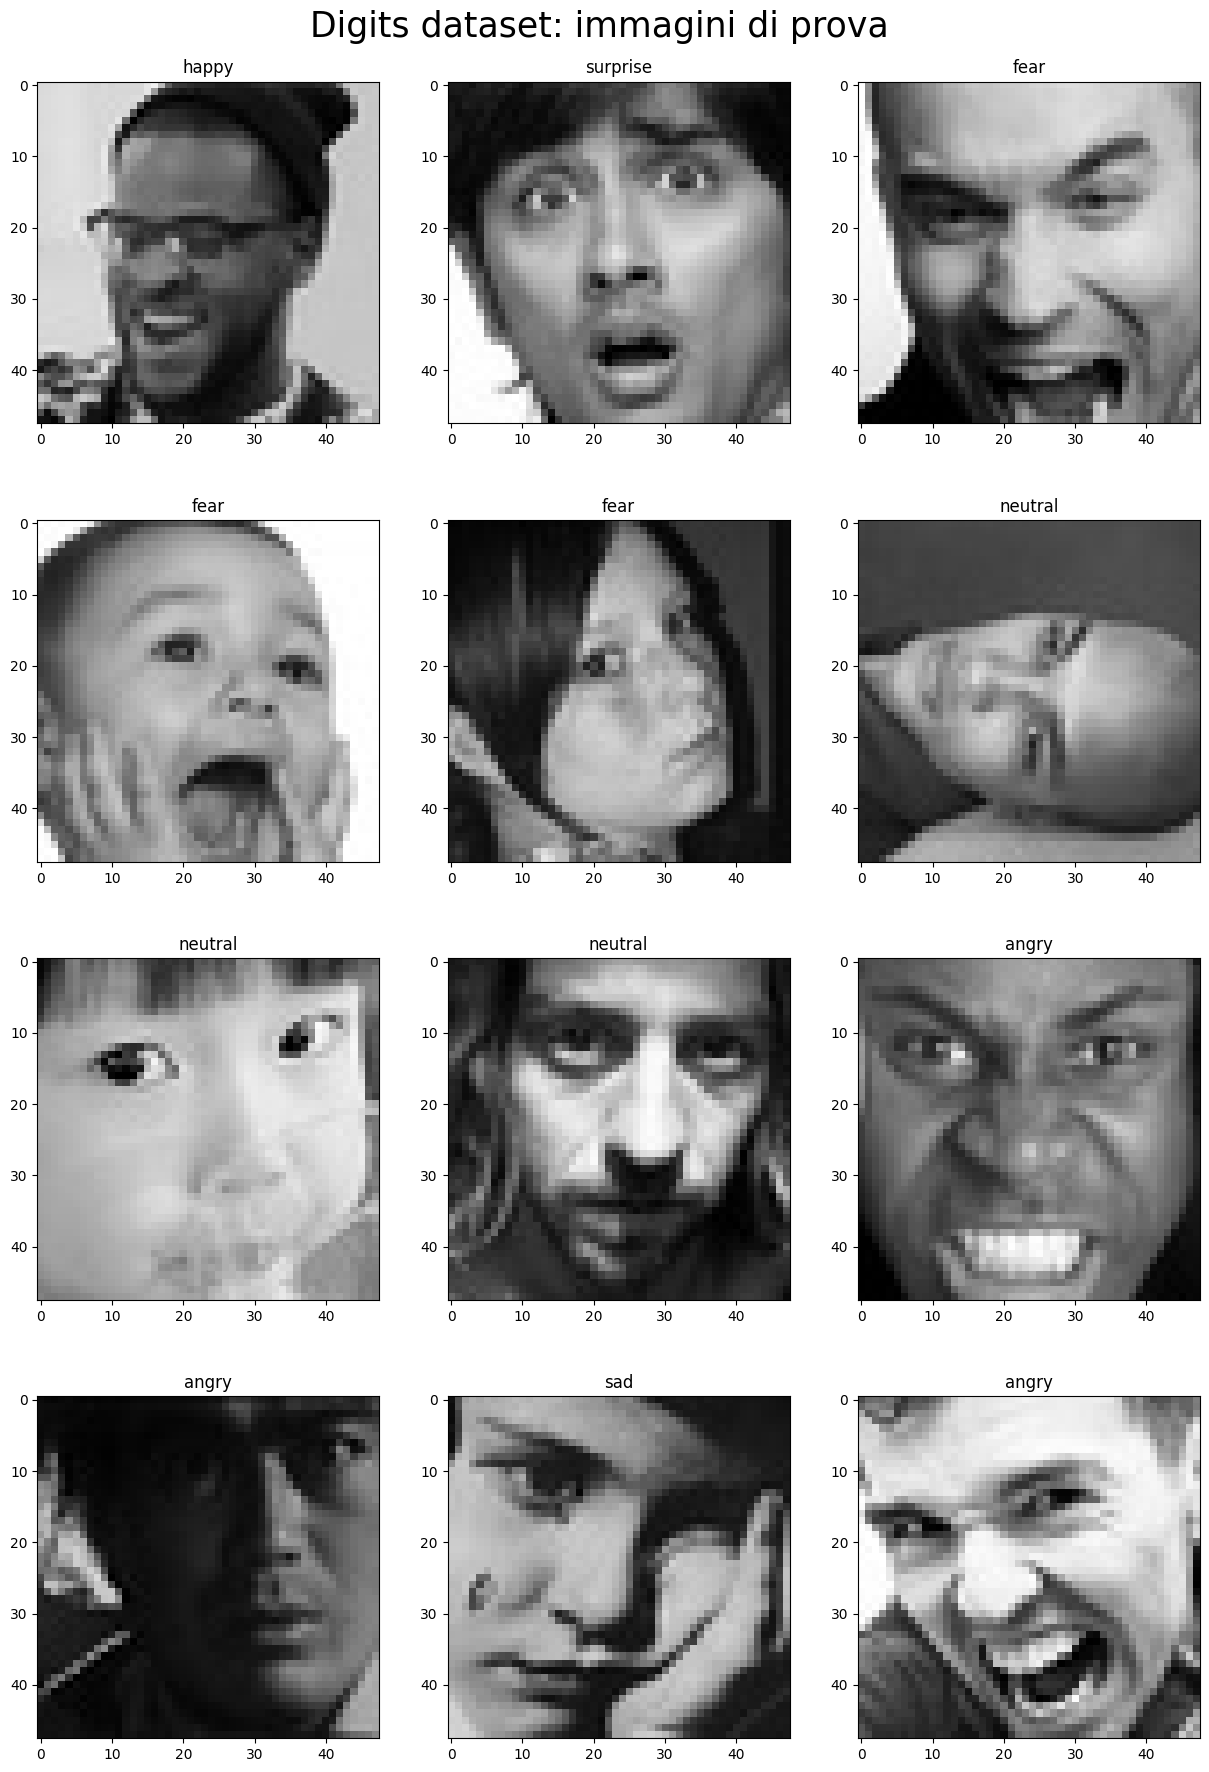

In [10]:
# Funzione per visualizzare alcuni elementi appartenenti al dataset
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j])
            ax[i][j].set_title(classes[np.argmax(lab[5*i+j])])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
img, lab = next(valDat)
studyDat(img, lab, cls)

## Costruzione della rete

In [4]:
# Funzione per la costruzione del modello
def buildMod(imW, imH, numcl):

    model = Sequential()
    model.add(Input(shape=(imW, imH, 1)))

    # Parte con i filtri convoluzionali
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())

    # Parte di classificazione
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(numcl, activation = 'softmax'))

    return model



model = buildMod(48, 48, 7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

## Allenamento del modello